In [2]:
import fly_plot_lib.plot as fpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import figurefirst as fifi
from scipy import stats
# from statsmodels.stats import proportions_ztest

2.2.4
recommended version: 1.1.1 or greater


In [916]:
from flystat.resampling import calc_statistical_significance_through_resampling

In [3]:
wt=pd.read_csv('../trimmed_data/main/wild_type_laminar_merged.csv')
orco=pd.read_csv('../trimmed_data/main/OrcoCsChrimson_laminar_wind_merged.csv')



In [3]:
wt=wt[wt['time stamp'].between(-100, 5000)]
orco=orco[orco['time stamp'].between(-100, 5000)]

In [4]:
#for some reason i didnt add ground speed in the wt preprocessing lol
wt['ground speed']=(wt['xvel']**2+wt['yvel']**2)**.5
orco['ground speed']=(orco['xvel']**2+orco['yvel']**2)**0.5

In [913]:
#separate flashes and shames
wt100=wt[wt['duration']==100]
wt0=wt[wt['duration']==0]
orco100=orco[orco['duration']==100]
orco0=orco[orco['duration']==0]

In [267]:
#helper function for slicing means with 95% CI's
def slice_means_gs(df, index):
    time_vec=[]
    mean_vec=[]
    upper_vec =[]
    lower_vec =[]
    for i in df['time stamp'].unique():
        if i >-100 and i <3000:
            dummy_df =df[df['time stamp']==i]
            dummy_df=dummy_df[dummy_df['ground speed'].between(0, 2.0)]
            time_vec.append(i)
            mean = dummy_df[index].mean()
            upper= dummy_df[index].mean() + dummy_df[index].sem()*1.96
            lower= dummy_df[index].mean() - dummy_df[index].sem()*1.96
            mean_vec.append(mean)
            upper_vec.append(upper)
            lower_vec.append(lower)
    return time_vec, mean_vec, upper_vec, lower_vec

In [727]:
#helper function for slicing means with standard errors
def slice_head_prop(df, index='heading', time_key= "time stamp", start=-100, stop=3000):
    time_vec=[]
    uw_vec =[]
    cw_vec =[]
    dw_vec =[]
    df=df[df[time_key].between(start, stop)]
    for i in df[time_key].unique():
        dummy_df =df[df[time_key]==i]
        dummy_df=dummy_df[dummy_df['ground speed'].between(0, 2.0)]
        time_vec.append(i)
        tot =float(len(dummy_df))
        dummy_df['abs head'] =np.abs(dummy_df[index])
        #df[df < 2.0 ].count() 
        uw = dummy_df[dummy_df['abs head']<np.pi/4.].count()
        cw =dummy_df[dummy_df['abs head'].between(np.pi/4., 3.*np.pi/4)].count()
        dw =dummy_df[dummy_df['abs head']>3*np.pi/4.].count()
        uw_vec.append(uw/tot)
        cw_vec.append(cw/tot)
        dw_vec.append(dw/tot)
    return time_vec, uw_vec, cw_vec, dw_vec
    

#  Figure generation for data parts of Figure 1

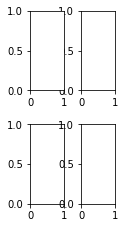

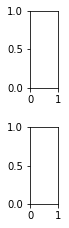

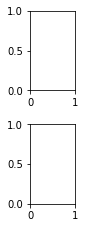

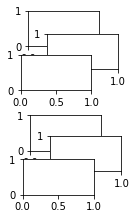

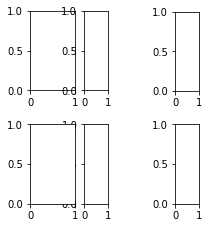

In [4]:
template = '../figure_first_templates/f1_part1.svg'
layout =fifi.svg_to_axes.FigureLayout(template, autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [855]:
#Standardize a couple size things so figures all come out the same
ms=4
lw=.5
fs=6
linew=.5
tl=3

# Example trajectories

In [856]:
orco_traj1 =pd.read_csv('../trajectories_for_figures/orco_laminar1.csv')
wt_traj1 =pd.read_csv('../trajectories_for_figures/wt_laminar1.csv')

In [857]:
#orco traj 1 setup
ax=layout.axes[('traj', 'orco1')]

In [858]:
pre=orco_traj1[orco_traj1['time stamp']<=0]
dur=orco_traj1[orco_traj1['time stamp'].between(0, 675)]
post = orco_traj1[orco_traj1['time stamp']>=675]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(orco_traj1['x'].iloc[0],orco_traj1['y'].iloc[0], marker = (3, 0, orco_traj1['heading deg'].iloc[0]+45),s=ms, color ='k')
ax.scatter(orco_traj1['x'].iloc[40],orco_traj1['y'].iloc[40], marker = (3, 0, orco_traj1['heading deg'].iloc[0]+30),s=ms, color ='k')
ax.scatter(orco_traj1['x'].iloc[80],orco_traj1['y'].iloc[80], marker = (3, 0, orco_traj1['heading deg'].iloc[0]+90),s=ms, color ='r')
ax.scatter(orco_traj1['x'].iloc[160],orco_traj1['y'].iloc[160], marker = (3, 0, orco_traj1['heading deg'].iloc[0]+180),s=ms, color ='k', zorder=4)
ax.scatter(orco_traj1['x'].iloc[210],orco_traj1['y'].iloc[210], marker = (3, 0, orco_traj1['heading deg'].iloc[0]+135),s=ms, color ='k', zorder=4)
ax.scatter(orco_traj1['x'].iloc[280],orco_traj1['y'].iloc[280], marker = (3, 0, orco_traj1['heading deg'].iloc[0]+175),s=ms, color ='k',  zorder=4)
ax.scatter(orco_traj1['x'].iloc[-1],orco_traj1['y'].iloc[-1], marker = (3, 0, orco_traj1['heading deg'].iloc[0]+180),s=ms, color ='k',  zorder=4)
ax.set_title("Orco>csChrimson")

ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)

fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])
ax.set_xticklabels([])



[]

In [859]:
#wt traj 1 setup
ax=layout.axes[('traj', 'wt1')]

In [860]:
pre=wt_traj1[wt_traj1['time stamp']<=0]
dur=wt_traj1[wt_traj1['time stamp'].between(0, 675)]
post = wt_traj1[wt_traj1['time stamp']>=675]
ax.plot(pre['x'], pre['y'], color ='k', linewidth = lw, alpha= 0.8)
ax.plot(dur['x'], dur['y'], color ='r', linewidth =lw, alpha =1)
ax.plot(post['x'], post['y'], color ='k', linewidth = lw, alpha = .8)


ax.scatter(wt_traj1['x'].iloc[0],wt_traj1['y'].iloc[0], marker = (3, 0, wt_traj1['heading deg'].iloc[0]+95), color ='k', s = ms)
ax.scatter(wt_traj1['x'].iloc[60],wt_traj1['y'].iloc[60], marker = (3, 0, wt_traj1['heading deg'].iloc[0]+98), color ='r', s = ms)
ax.scatter(wt_traj1['x'].iloc[110],wt_traj1['y'].iloc[110], marker = (3, 0, wt_traj1['heading deg'].iloc[0]+30), color ='k', s = ms, zorder=4)
ax.scatter(wt_traj1['x'].iloc[145],wt_traj1['y'].iloc[145], marker = (3, 0, wt_traj1['heading deg'].iloc[0]+60), color ='k', s = ms, zorder=4)
ax.scatter(wt_traj1['x'].iloc[-1],wt_traj1['y'].iloc[-1], marker = (3, 0, wt_traj1['heading deg'].iloc[0]+160), color ='k', s = ms, zorder=4)

fifi.mpl_functions.set_fontsize(ax, fs)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [861]:
# Orco 2
orco_traj2=pd.read_csv('../trajectories_for_figures/orco_traj2.csv')

In [862]:
ax=layout.axes[('traj', 'orco3')]

In [863]:
pre=orco_traj2[orco_traj2['time stamp'].between(-100, 0)]
dur=orco_traj2[orco_traj2['time stamp'].between(0, 675)]
post = orco_traj2[orco_traj2['time stamp']>=675]

ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)


ax.scatter(orco_traj2['x'].iloc[8],orco_traj2['y'].iloc[8], marker = (3, 0, orco_traj2['heading'].iloc[8]),s=ms, color ='k')
ax.scatter(orco_traj2['x'].iloc[23],orco_traj2['y'].iloc[23], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms,  color ='r')
ax.scatter(orco_traj2['x'].iloc[130],orco_traj2['y'].iloc[130], marker = (3, 0, orco_traj2['heading'].iloc[0]+90),s=ms, color ='k', zorder=4)
ax.scatter(orco_traj2['x'].iloc[185],orco_traj2['y'].iloc[185], marker = (3, 0, orco_traj2['heading'].iloc[0]+119),s=ms, color ='k', zorder=4)
ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)

fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])
ax.set_xticklabels([])


[]

In [864]:
orco_traj3=pd.read_csv('../trajectories_for_figures/orco_traj3.csv')

In [865]:
ax=layout.axes[('traj', 'orco2')]

In [866]:
pre=orco_traj3[orco_traj3['time stamp'].between(-100, 0)]
dur=orco_traj3[orco_traj3['time stamp'].between(0, 675)]
post = orco_traj3[orco_traj3['time stamp']>=675]

ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)

ax.scatter(orco_traj3['x'].iloc[7],orco_traj3['y'].iloc[7], marker = (3, 0, orco_traj3['heading'].iloc[8]+60),s=ms, color ='k')
ax.scatter(orco_traj3['x'].iloc[50],orco_traj3['y'].iloc[50], marker = (3, 0, orco_traj3['heading'].iloc[0]+45),s=ms, color ='r')
ax.scatter(orco_traj3['x'].iloc[130],orco_traj3['y'].iloc[130], marker = (3, 0, orco_traj3['heading'].iloc[0]+160),s=ms, color ='k', zorder=4)
ax.scatter(orco_traj3['x'].iloc[185],orco_traj3['y'].iloc[185], marker = (3, 0, orco_traj2['heading'].iloc[0]+60),s=ms, color ='k', zorder=4)
ax.scatter(orco_traj3['x'].iloc[260],orco_traj3['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+190),s=ms, color ='k',  zorder=4)
ax.scatter(orco_traj3['x'].iloc[340],orco_traj3['y'].iloc[340], marker = (3, 0, orco_traj2['heading'].iloc[0]+55),s=ms, color ='k',  zorder=4)
ax.scatter(orco_traj3['x'].iloc[410],orco_traj3['y'].iloc[410], marker = (3, 0, orco_traj2['heading'].iloc[0]+100),s=ms, color ='k',  zorder=4)
ax.scatter(orco_traj3['x'].iloc[-1],orco_traj3['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]+60),s=ms, color ='k',  zorder=4)

fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])
ax.set_xticklabels([])

[]

In [867]:
wt_traj2=pd.read_csv('../trajectories_for_figures/wt_traj2.csv')

In [868]:
ax=layout.axes[('traj', 'wt3')]

In [869]:
pre=wt_traj2[wt_traj2['time stamp'].between(-200, 0)]
dur=wt_traj2[wt_traj2['time stamp'].between(0, 675)]
post = wt_traj2[wt_traj2['time stamp']>=675]

ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)

ax.scatter(wt_traj2['x'].iloc[7], wt_traj2['y'].iloc[7], marker = (3, 0, orco_traj3['heading'].iloc[8]+90),s=ms, color ='k')
ax.scatter(wt_traj2['x'].iloc[45],wt_traj2['y'].iloc[45], marker = (3, 0, orco_traj3['heading'].iloc[0]+55),s=ms,  color ='r')
ax.scatter(wt_traj2['x'].iloc[80],wt_traj2['y'].iloc[80], marker = (3, 0, orco_traj3['heading'].iloc[0]+65),s=ms, color ='r')
ax.scatter(wt_traj2['x'].iloc[120],wt_traj2['y'].iloc[120], marker = (3, 0, orco_traj3['heading'].iloc[0]+70),s=ms, color ='k', zorder=4)
ax.scatter(wt_traj2['x'].iloc[-1],wt_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]+60),s=ms, color ='k', zorder=4)

fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])
ax.set_xticklabels([])

[]

In [870]:
wt_traj3=pd.read_csv('../trajectories_for_figures/wt_traj3.csv')

In [871]:
ax=layout.axes[('traj', 'wt2')]

In [872]:
pre=wt_traj3[wt_traj3['time stamp'].between(-200, 0)]
dur=wt_traj3[wt_traj3['time stamp'].between(0, 675)]
post = wt_traj3[wt_traj3['time stamp']>=675]

ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)

ax.scatter(pre['x'].iloc[0], pre['y'].iloc[0], marker = (3, 0, orco_traj3['heading'].iloc[8]+110),s=ms, color ='k')
ax.scatter(dur['x'].iloc[30],dur['y'].iloc[30], marker = (3, 0, orco_traj3['heading'].iloc[0]),s=ms,  color ='r')
ax.scatter(post['x'].iloc[20],post['y'].iloc[20], marker = (3, 0, orco_traj3['heading'].iloc[0]+130),s=ms, color ='k')
ax.scatter(post['x'].iloc[65],post['y'].iloc[65], marker = (3, 0, orco_traj3['heading'].iloc[0]+110),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[115],post['y'].iloc[115], marker = (3, 0, orco_traj3['heading'].iloc[0]+60),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, orco_traj3['heading'].iloc[0]+75),s=ms, color ='k', zorder=4)


fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])
ax.set_xticklabels([])

[]

# Angular velocity traces for example trajectories

In [873]:
ax=layout.axes[('ang_vel', 'orco')]

In [874]:
orco_traj3['head_unwrap']=np.unwrap(orco_traj3['heading'])
orco_traj3['ang vel unwrap']=orco_traj3['head_unwrap'].diff()/.01
pre3=orco_traj3[orco_traj3['time stamp']<=0]
dur3 =orco_traj3[orco_traj3['time stamp'].between(0, 680)]
post3 =orco_traj3[orco_traj3['time stamp'].between(680, 5000)]

In [875]:
ax.plot(pre3['ang vel unwrap'], pre3['time stamp'], linewidth =linew, color = 'k')
ax.plot(dur3['ang vel unwrap'], dur3['time stamp'], linewidth =linew, color = 'red')
ax.plot(post3['ang vel unwrap'], post3['time stamp'], linewidth =linew, color = 'k')

ax.set_xticklabels([' ', '0', ' '])

fifi.mpl_functions.adjust_spines(ax, [ 'bottom'], xticks =[-60, 0, 60], yticks=[0, .675, 5000], tick_length = tl, linewidth = .5)
fifi.mpl_functions.set_fontsize(ax, fs)

In [876]:
ax=layout.axes[('ang_vel', 'wt')]

In [877]:
wt_traj3['head_unwrap']=np.unwrap(wt_traj3['heading'])
wt_traj3['ang vel unwrap']=wt_traj3['head_unwrap'].diff()/.01
pre3=wt_traj3[wt_traj3['time stamp'].between(-100, 0)]
dur3 =wt_traj3[wt_traj3['time stamp'].between(0, 680)]
post3 =wt_traj3[wt_traj3['time stamp'].between(680, 5000)]

In [878]:
ax.plot(pre3['ang vel unwrap'], pre3['time stamp'], linewidth =linew, color = 'k')
ax.plot(dur3['ang vel unwrap'], dur3['time stamp'], linewidth =linew, color = 'red')
ax.plot(post3['ang vel unwrap'], post3['time stamp'], linewidth =linew, color = 'k')

ax.set_xticklabels([' ', '0', ' '])
ax.set_ylim(-100, 5000)
fifi.mpl_functions.adjust_spines(ax, [ 'bottom'], xticks =[-60, 0, 60], yticks=[0, .675, 5000], tick_length = tl, linewidth = .5)
fifi.mpl_functions.set_fontsize(ax, fs)

# Course Direction heat map: Orco>CsChrimson Flash

In [879]:
ax=layout.axes[('hm', 'orco')]

In [880]:
cmap_reversed = plt.cm.get_cmap('bone_r')
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(orco100['time stamp'], orco100['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)


ax.set_xticklabels([])
ax.set_yticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)


# Course Direction heat map: Wild Type Control Flash

In [881]:
ax=layout.axes[('hm', 'wt')]

In [882]:
cmap_reversed = plt.cm.get_cmap('bone_r')

ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)

ax.set_yticklabels([])
ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', '0',r'$\pi/2$', r'$\pi$' ])

ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(wt100['time stamp'], wt100['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)

sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)

# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Course Direction Heat Map: Orco>CsChrimson Sham events

In [883]:
ax=layout.axes[('hm_s', 'orco')]

In [884]:
cmap_reversed = plt.cm.get_cmap('bone_r')


ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(orco0['time stamp'], orco0['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)

sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)

ax.set_yticklabels([])
ax.set_xticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)


# Wild type sham events


In [885]:
ax=layout.axes[('hm_s', 'wt')]

In [886]:
cmap_reversed = plt.cm.get_cmap('bone_r')


ax.set_xlim(-3.2, 3.2)

ax.set_xticklabels([ ])
ax.set_yticklabels([ ])

ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(wt0['time stamp'], wt0['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)

sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Orco>CsChrimson ground speed

In [887]:
ax=layout.axes[('meat', 'orco_gs')]

In [888]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies
t, m, u, l= slice_means_gs(orco100, 'ground speed')
t0, m0, u0, l0=slice_means_gs(orco0, 'ground speed')

In [889]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)

ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)

ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .6], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Wild Type Control ground speed

In [890]:
ax=layout.axes[('meat', 'wt_gs')]

In [891]:
#Grab population mean and Ci's for wt flash and shams
t_wt, m_wt, u_wt, l_wt= slice_means_gs(wt100, 'ground speed')
t0_wt, m0_wt, u0_wt, l0_wt=slice_means_gs(wt0, 'ground speed')

In [892]:
ax.plot(m_wt, t_wt, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0_wt, t0_wt, color ='k', label = 'Control', linewidth=.5)
ax.fill_betweenx(t0_wt, u0_wt, l0_wt, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_betweenx(t_wt, u_wt, l_wt, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .6], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Orco>CsChrimson altitude plots

In [893]:
ax=layout.axes[('meat', 'orco_alt')]

In [894]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies for altitude
t, m, u, l= slice_means_gs(orco100, 'z')
t0, m0, u0, l0=slice_means_gs(orco0, 'z')

In [895]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)
#ax.set_ylabel("Ground Speed (m/s)")
ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .5], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Wild Type Control altitude plots

In [896]:
ax=layout.axes[('meat', 'wt_alt')]

In [897]:
#Grab population mean and Ci's for wt flash and shams for altitude figure
t_wt, m_wt, u_wt, l_wt= slice_means_gs(wt100, 'z')
t0_wt, m0_wt, u0_wt, l0_wt=slice_means_gs(wt0, 'z')

In [898]:
ax.plot(m_wt, t_wt, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0_wt, t0_wt, color ='k', label = 'Control', linewidth=.5)
ax.fill_betweenx(t0_wt, u0_wt, l0_wt, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_betweenx(t_wt, u_wt, l_wt, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_ylim(-100, 3000)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .5], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Orientration proportions to accompany heat maps

In [899]:
ax=layout.axes[('hm','prop', 'orco_prop_f')]

In [900]:
t, uw, cw, dw= slice_head_prop(orco100)

In [901]:
ax.plot(uw, t, color = 'green', linewidth =.5)
ax.plot(cw, t, color ='blue', linewidth=.5)
ax.plot(dw, t, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [902]:
ax=layout.axes[('hm','prop', 'orco_prop_s')]

In [903]:
t0, uw0, cw0, dw0= slice_head_prop(orco0)

In [904]:
ax.plot(uw0, t0, color = 'green', linewidth =.5)
ax.plot(cw0, t0, color ='blue', linewidth=.5)
ax.plot(dw0, t0, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [905]:
ax=layout.axes[('hm','prop', 'wt_prop_f')]

In [906]:
#wt_t100, wt_uw100, wt_cw100, wt_dw100= slice_head_prop(wt100)

ax.plot(wt_uw100, wt_t100, color = 'green', linewidth =.5)
ax.plot(wt_cw100, wt_t100, color ='blue', linewidth=.5)
ax.plot(wt_dw100, wt_t100, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)

In [907]:
ax=layout.axes[('hm','prop', 'wt_prop_s')]

In [908]:
#wt_t0, wt_uw0, wt_cw0, wt_dw0= slice_head_prop(wt0)

ax.plot(wt_uw0,wt_t0, color = 'green', linewidth =.5)
ax.plot(wt_cw0, wt_t0, color ='blue', linewidth=.5)
ax.plot(wt_dw0, wt_t0, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)

# FigureFirst save to figure template

In [909]:
layout.append_figure_to_layer(layout.figures['traj'], 'traj', cleartarget=True)
layout.append_figure_to_layer(layout.figures['ang_vel'], 'ang_vel', cleartarget=True)
layout.append_figure_to_layer(layout.figures['hm'], 'hm', cleartarget=True)
layout.append_figure_to_layer(layout.figures['meat'], 'meat', cleartarget=True)
layout.append_figure_to_layer(layout.figures['hm_s'], 'hm_s', cleartarget=True)
layout.write_svg(template)